In [1]:
import pystac_client
import planetary_computer
import matplotlib.pyplot as plt

import stackstac
import odc.stac
from geogif import gif

from pystac.extensions.eo import EOExtension as eo

In [2]:
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)
bbox = [-112.826843, 32.974108, -111.184387, 33.863574]

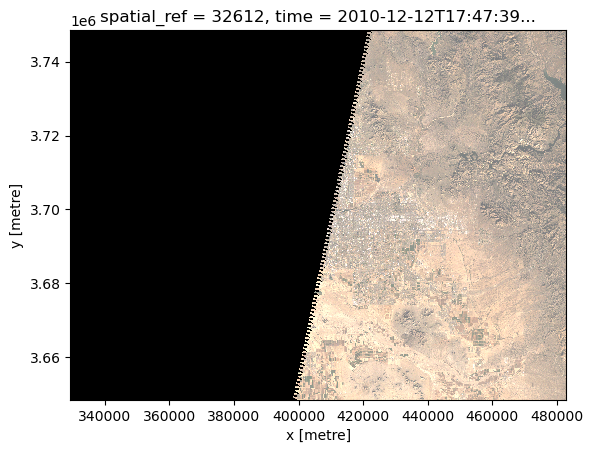

In [47]:
years = [2000, 2005, 2010, 2015, 2020]
year = 2010

search = catalog.search(
    collections=["landsat-c2-l2"],
    bbox=bbox,
    datetime=str(year),
    query={"eo:cloud_cover": {"lt": 10}},
)

items = search.item_collection()

selected_item = min(items, key=lambda item: eo.ext(item).cloud_cover)

data = odc.stac.stac_load(
    [selected_item], 
    bands=["red", "green", "blue"],
    bbox=bbox
)
data = data.squeeze()
data.to_array().plot.imshow(robust=True)

In [ ]:
# for key, asset in selected_item.assets.items():
#     print(f"{key}: {asset.title}")

In [43]:
data.to_array(dim='band')

<xarray.DataArray (band: 3, y: 3338, x: 5123)>
array([[[    0,     0,     0, ..., 10190, 10191, 10409],
        [    0,     0,     0, ..., 10625, 10843, 10843],
        [    0,     0,     0, ..., 10843, 10952, 11061],
        ...,
        [    0,     0,     0, ..., 13127, 13229, 12809],
        [    0,     0,     0, ..., 13334, 12914, 12388],
        [    0,     0,     0, ..., 11967, 11652, 11441]],

       [[    0,     0,     0, ...,  9597,  9721,  9844],
        [    0,     0,     0, ...,  9964, 10088, 10210],
        [    0,     0,     0, ..., 10208, 10209, 10331],
        ...,
        [    0,     0,     0, ..., 12055, 12052, 11698],
        [    0,     0,     0, ..., 11817, 11698, 11344],
        [    0,     0,     0, ..., 11343, 10870, 10870]],

       [[    0,     0,     0, ...,  8957,  9071,  8959],
        [    0,     0,     0, ...,  9069,  9403,  9293],
        [    0,     0,     0, ...,  9178,  9179,  9292],
        ...,
        [    0,     0,     0, ..., 10550, 10979, 10657],
        [    0,     0,     0, ..., 10333, 10441, 10226],
        [    0,     0,     0, ..., 10008,  9900,  9794]]], dtype=uint16)
Coordinates:
  * y            (y) float64 3.749e+06 3.749e+06 ... 3.648e+06 3.648e+06
  * x            (x) float64 3.293e+05 3.293e+05 ... 4.829e+05 4.83e+05
    spatial_ref  int32 32612
    time         datetime64[ns] 2000-12-24T17:48:17.190316
  * band         (band) object 'red' 'green' 'blue'

In [3]:
search = catalog.search(collections=["io-lulc-9-class"], 
                        bbox=bbox)
items = search.item_collection()
len(items)

6

6

In [8]:
data = stackstac.stack(
    items, 
    bounds_latlon=bbox,
    epsg=3857,
    resolution=1000
)

data

/srv/conda/envs/notebook/lib/python3.11/site-packages/stackstac/prepare.py:363: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(


<xarray.DataArray 'stackstac-e6cdfc1fa43fed15b72a86177bc607d0' (time: 6,
                                                                band: 1,
                                                                y: 120, x: 184)>
dask.array<fetch_raster_window, shape=(6, 1, 120, 184), dtype=float64, chunksize=(1, 1, 120, 184), chunktype=numpy.ndarray>
Coordinates: (12/15)
  * time             (time) datetime64[ns] NaT NaT NaT NaT NaT NaT
    id               (time) <U8 '12S-2022' '12S-2021' ... '12S-2018' '12S-2017'
  * band             (band) <U4 'data'
  * x                (x) float64 -1.256e+07 -1.256e+07 ... -1.238e+07 -1.238e+07
  * y                (y) float64 4.011e+06 4.01e+06 ... 3.893e+06 3.892e+06
    proj:shape       object {89162, 56684}
    ...               ...
    io:tile_id       <U3 '12S'
    end_datetime     (time) <U20 '2023-01-01T00:00:00Z' ... '2018-01-01T00:00...
    start_datetime   (time) <U20 '2022-01-01T00:00:00Z' ... '2017-01-01T00:00...
    io:supercell_id  <U3 '12S'
    raster:bands     object {'nodata': 0, 'spatial_resolution': 10}
    epsg             int64 3857
Attributes:
    spec:        RasterSpec(epsg=3857, bounds=(-12560000, 3891000, -12376000,...
    crs:         epsg:3857
    transform:   | 1000.00, 0.00,-12560000.00|\n| 0.00,-1000.00, 4011000.00|\...
    resolution:  1000

In [9]:
x = data.compute()

In [10]:
x

<xarray.DataArray 'stackstac-e6cdfc1fa43fed15b72a86177bc607d0' (time: 6,
                                                                band: 1,
                                                                y: 120, x: 184)>
array([[[[11., 11., 11., ..., 11., 11., 11.],
         [11., 11., 11., ..., 11., 11., 11.],
         [11., 11., 11., ..., 11., 11., 11.],
         ...,
         [11.,  5.,  5., ..., 11., 11., 11.],
         [11., 11., 11., ..., 11., 11., 11.],
         [11., 11., 11., ..., 11., 11., 11.]]],


       [[[11., 11., 11., ..., 11., 11., 11.],
         [11., 11., 11., ..., 11., 11., 11.],
         [11., 11., 11., ..., 11., 11., 11.],
         ...,
         [11.,  5.,  5., ..., 11., 11., 11.],
         [11., 11.,  2., ..., 11., 11., 11.],
         [11., 11., 11., ..., 11., 11., 11.]]],


       [[[11., 11., 11., ..., 11., 11., 11.],
         [11., 11., 11., ..., 11., 11., 11.],
...
         [ 2., 11.,  2., ..., 11., 11., 11.],
         [11., 11., 11., ..., 11., 11., 11.]]],


       [[[11., 11., 11., ..., 11., 11., 11.],
         [11., 11., 11., ..., 11., 11., 11.],
         [11., 11., 11., ..., 11., 11., 11.],
         ...,
         [11.,  5.,  5., ..., 11., 11., 11.],
         [ 2., 11.,  2., ..., 11., 11., 11.],
         [11., 11., 11., ..., 11., 11., 11.]]],


       [[[11., 11., 11., ..., 11., 11., 11.],
         [11., 11., 11., ..., 11., 11., 11.],
         [11., 11., 11., ..., 11., 11., 11.],
         ...,
         [11.,  5.,  5., ..., 11., 11., 11.],
         [ 2., 11.,  2., ..., 11., 11., 11.],
         [11., 11., 11., ..., 11., 11., 11.]]]])
Coordinates: (12/15)
  * time             (time) datetime64[ns] NaT NaT NaT NaT NaT NaT
    id               (time) <U8 '12S-2022' '12S-2021' ... '12S-2018' '12S-2017'
  * band             (band) <U4 'data'
  * x                (x) float64 -1.256e+07 -1.256e+07 ... -1.238e+07 -1.238e+07
  * y                (y) float64 4.011e+06 4.01e+06 ... 3.893e+06 3.892e+06
    proj:shape       object {89162, 56684}
    ...               ...
    io:tile_id       <U3 '12S'
    end_datetime     (time) <U20 '2023-01-01T00:00:00Z' ... '2018-01-01T00:00...
    start_datetime   (time) <U20 '2022-01-01T00:00:00Z' ... '2017-01-01T00:00...
    io:supercell_id  <U3 '12S'
    raster:bands     object {'nodata': 0, 'spatial_resolution': 10}
    epsg             int64 3857
Attributes:
    spec:        RasterSpec(epsg=3857, bounds=(-12560000, 3891000, -12376000,...
    crs:         epsg:3857
    transform:   | 1000.00, 0.00,-12560000.00|\n| 0.00,-1000.00, 4011000.00|\...
    resolution:  1000

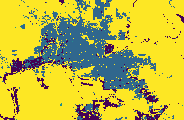

In [13]:
gif(x, date_format=None)